In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")

In [3]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.shape

(1197, 15)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [6]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [7]:
wip_mean=df['wip'].mean()

In [8]:
df['wip'] = df['wip'].fillna(wip_mean)

In [9]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [10]:
#detect outliers using the IQR method
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers


In [11]:
# Define the subset of columns to consider
columns_of_interest = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Find outliers for the specified columns only
outliers = df[columns_of_interest].apply(find_outliers_iqr)



In [12]:
outliers_sum = outliers.sum()

# Print the sum of outliers for each variable
print("Sum of outliers for each variable:")
print(outliers_sum)

Sum of outliers for each variable:
smv                        0
wip                      163
over_time                  1
incentive                 11
idle_time                 18
idle_men                  18
no_of_style_change       147
no_of_workers              0
actual_productivity       54
targeted_productivity     79
dtype: int64


# Descriptive Data Analysis

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [16]:
# Sort the dataframe by 'date'
df = df.sort_values(by='date')

In [17]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
18,2015-01-01,Quarter1,finishing,Thursday,11,0.70,4.15,1190.465991,1440,0,0.0,0,0,12.0,0.436326
17,2015-01-01,Quarter1,sweing,Thursday,4,0.65,23.69,861.000000,7200,0,0.0,0,0,60.0,0.521180
16,2015-01-01,Quarter1,finishing,Thursday,7,0.80,2.90,1190.465991,960,0,0.0,0,0,8.0,0.540729
15,2015-01-01,Quarter1,finishing,Thursday,4,0.75,3.94,1190.465991,2160,0,0.0,0,0,18.0,0.593056


In [18]:
# Add an index column
df.reset_index(inplace=True)

# Show the modified DataFrame
df.head(2)


,index,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2015-01-01,Quarter1,sweing,Thursday,8,0.8,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,18,2015-01-01,Quarter1,finishing,Thursday,11,0.7,4.15,1190.465991,1440,0,0.0,0,0,12.0,0.436326


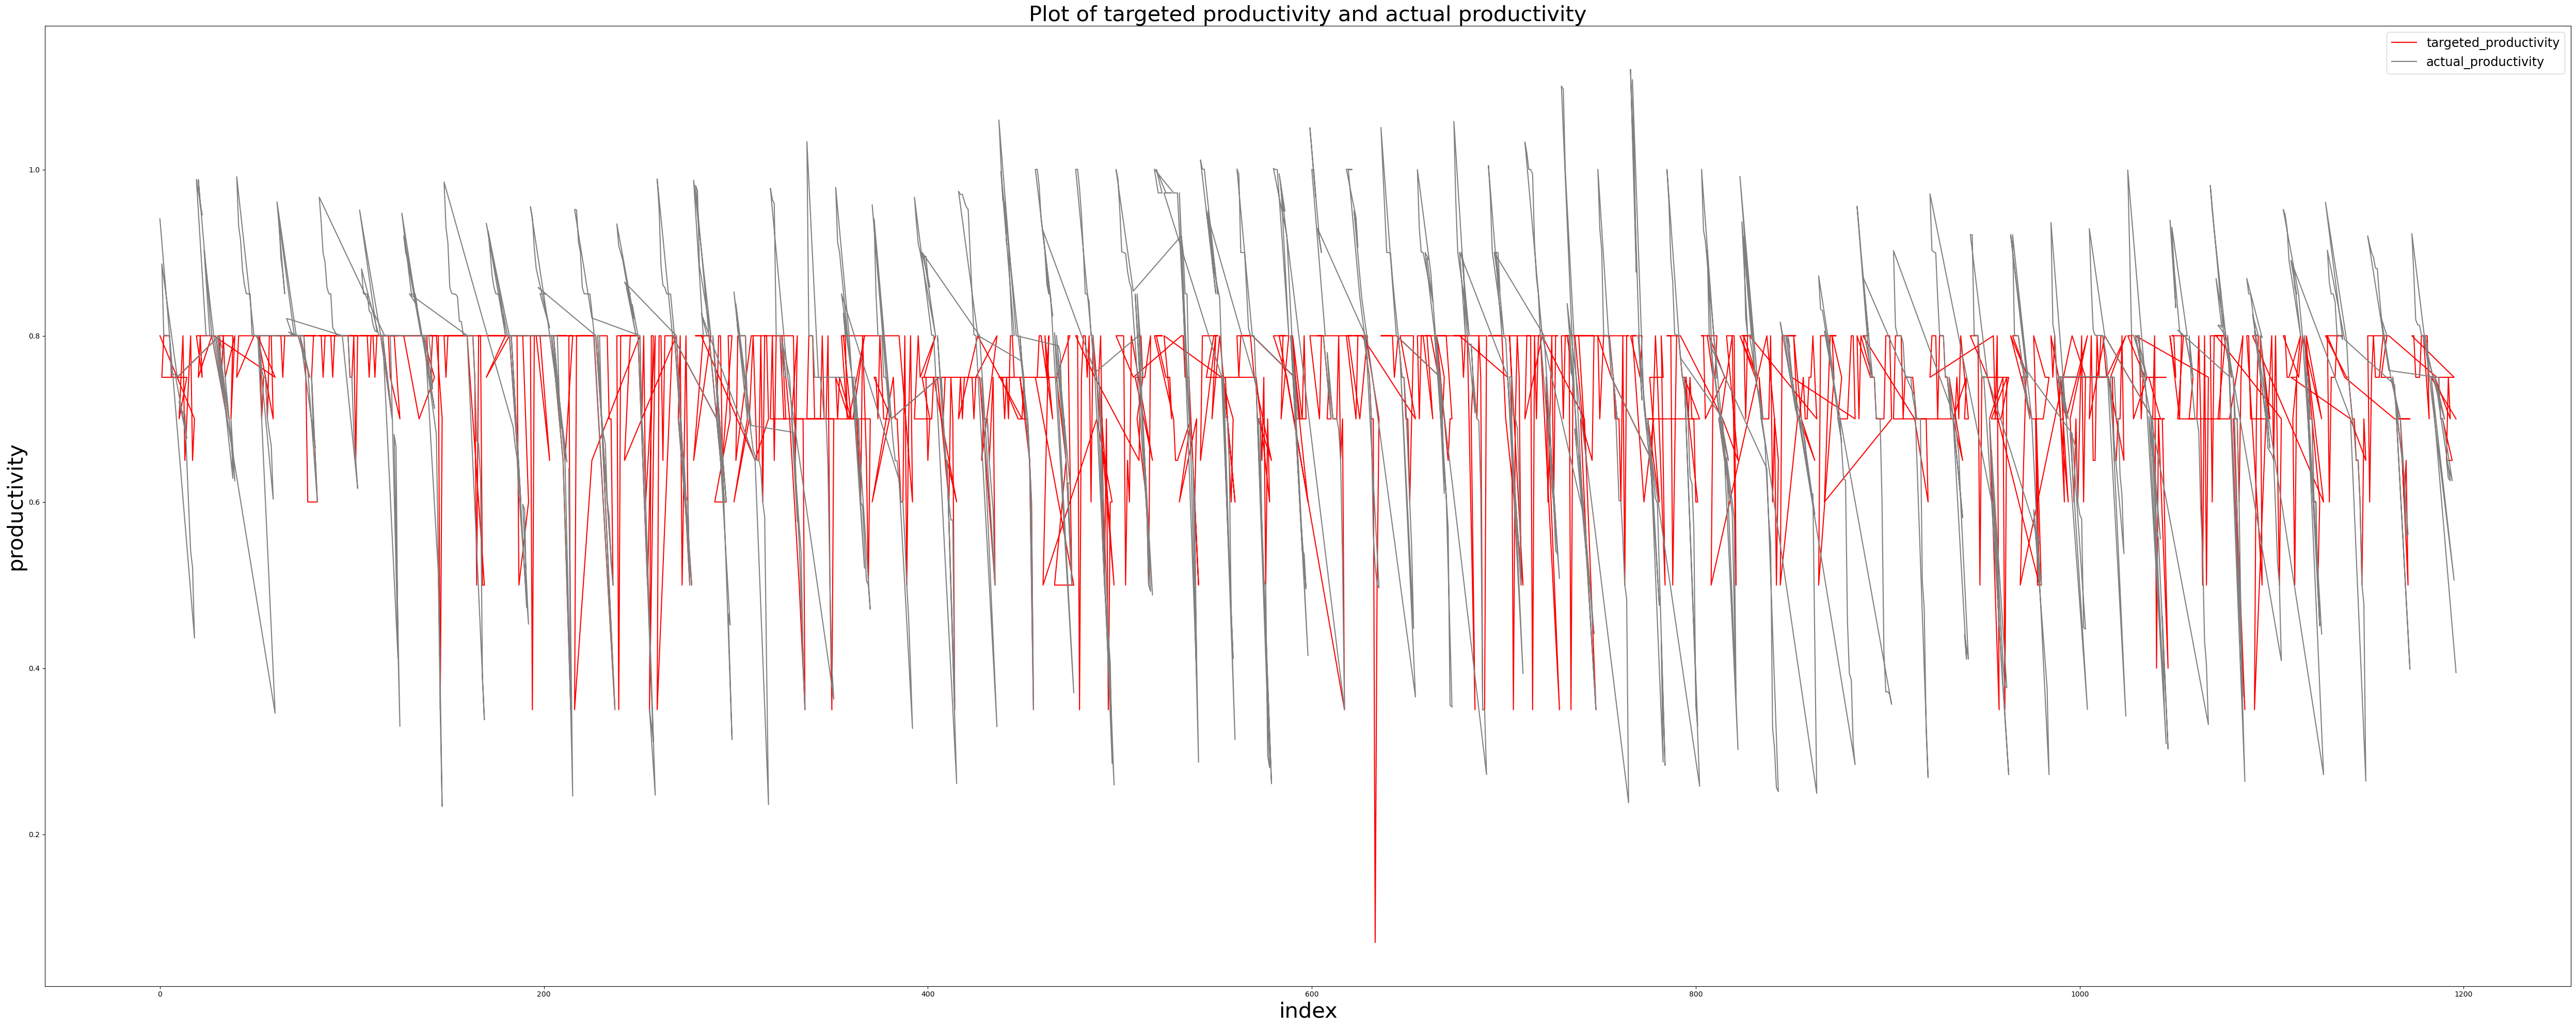

In [19]:

x = df['index']
y1 = df['targeted_productivity']
y2 = df['actual_productivity']

# Plotting
plt.figure(figsize=(50, 20))

# Plot y1
plt.plot(x, y1, label='targeted_productivity', color='red')

# Plot y2
plt.plot(x, y2, label='actual_productivity', color='gray')

# Add labels and title
plt.xlabel('index',fontsize=30)
plt.ylabel('productivity',fontsize=30)
plt.title('Plot of targeted productivity and actual productivity',fontsize=30)
plt.legend(fontsize='xx-large')

# Show plot
plt.tight_layout()
plt.show()

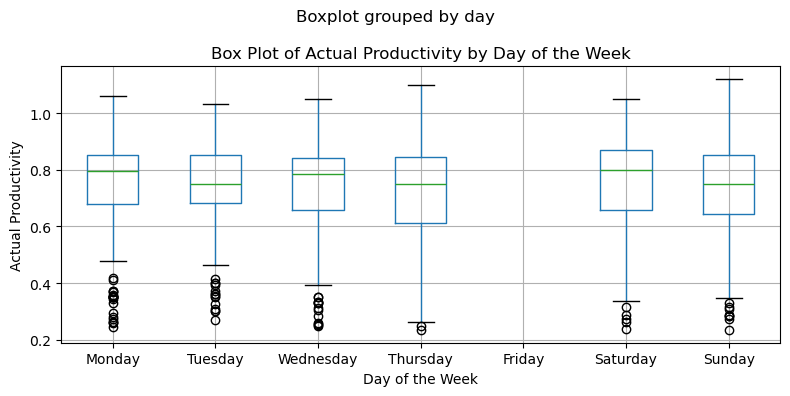

In [20]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the 'day' column based on the defined order
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)


# Create a box plot of 'actual_productivity' grouped by 'day' with specified order
df.boxplot(column='actual_productivity', by='day', figsize=(8,4))

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Actual Productivity')
plt.title('Box Plot of Actual Productivity by Day of the Week')



# Show plot
plt.tight_layout()
plt.show()

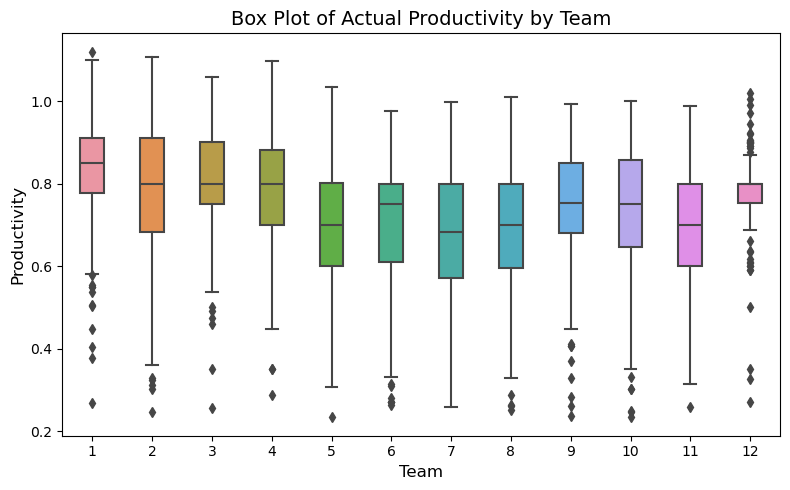

In [21]:
import seaborn as sns

# Plotting
plt.figure(figsize=(8, 5))

# Create side-by-side box plots for 'actual_productivity' and 'targeted_productivity' grouped by 'team'
sns.boxplot(data=df, x='team', y='actual_productivity', width=0.4, linewidth=1.5)

# Add labels and title
plt.xlabel('Team', fontsize=12)
plt.ylabel('Productivity', fontsize=12)
plt.title('Box Plot of Actual Productivity by Team',fontsize=14)


# Show plot
plt.tight_layout()
plt.show()

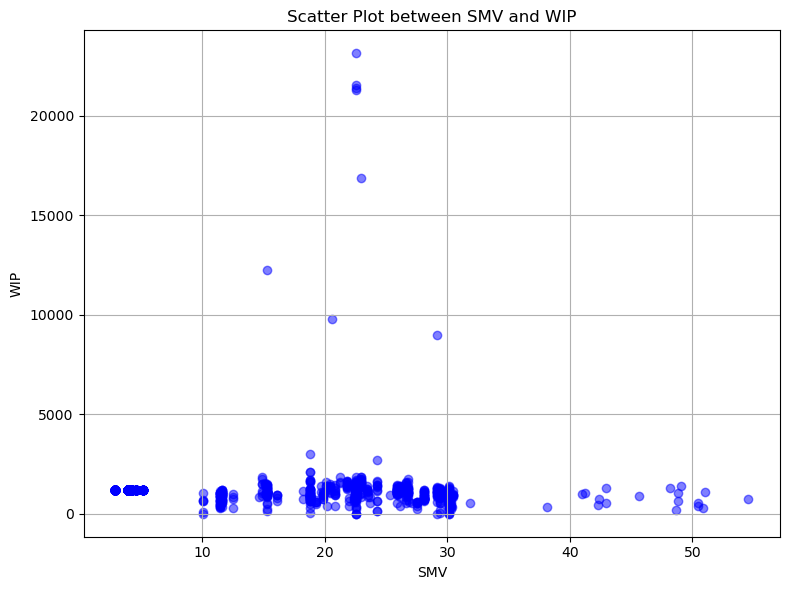

In [22]:
# Plotting scatter plot between 'smv' and 'wip'
plt.figure(figsize=(8, 6))

# Create scatter plot
plt.scatter(df['smv'], df['wip'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('SMV')
plt.ylabel('WIP')
plt.title('Scatter Plot between SMV and WIP')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

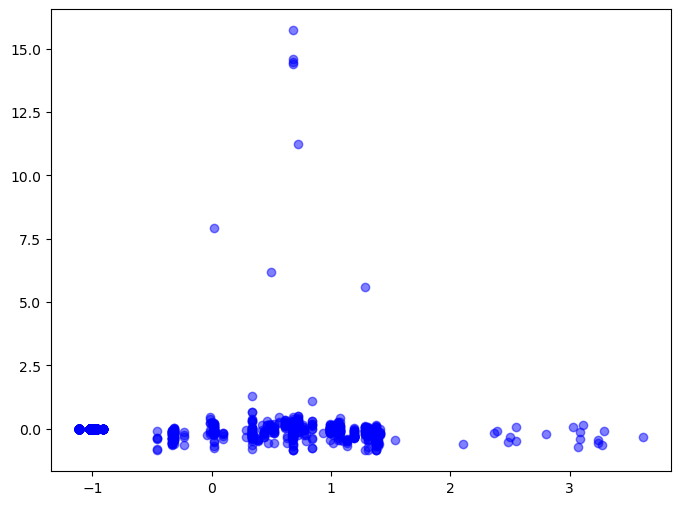

In [23]:
#with Standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the 'smv' and 'wip' columns
df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_scaled[['smv', 'wip']] = scaler.fit_transform(df[['smv', 'wip']])

# Plotting
plt.figure(figsize=(8, 6))

# Create scatter plot with scaled values
plt.scatter(df_scaled['smv'], df_scaled['wip'], color='blue', alpha=0.5)

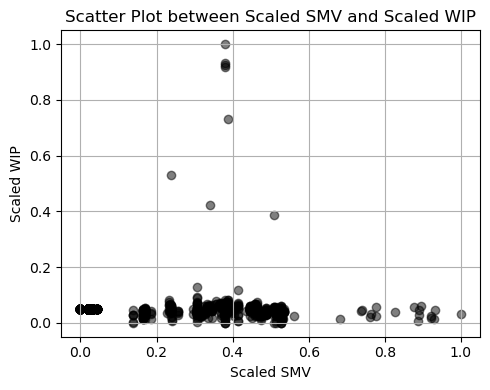

In [24]:
# with the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'smv' and 'wip' columns
df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_scaled[['smv', 'wip']] = scaler.fit_transform(df[['smv', 'wip']])

# Plotting
plt.figure(figsize=(5, 4))

# Create scatter plot with scaled values
plt.scatter(df_scaled['smv'], df_scaled['wip'], color='black', alpha=0.5)

# Add labels and title
plt.xlabel('Scaled SMV')
plt.ylabel('Scaled WIP')
plt.title('Scatter Plot between Scaled SMV and Scaled WIP')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
print(df['department'].unique())


['sweing' 'finishing' 'finishing ']


In [26]:
# Replace 'finishing ' with 'finishing' in the 'department' column
df['department'] = df['department'].replace('finishing ', 'finishing')

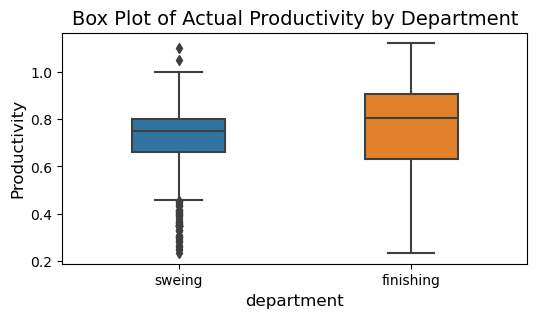

In [27]:
import seaborn as sns

# Plotting
plt.figure(figsize=(6, 3))

# Create side-by-side box plots for 'actual_productivity' and 'targeted_productivity' grouped by 'team'
sns.boxplot(data=df, x='department', y='actual_productivity', width=0.4, linewidth=1.5)

# Add labels and title
plt.xlabel('department', fontsize=12)
plt.ylabel('Productivity', fontsize=12)
plt.title('Box Plot of Actual Productivity by Department',fontsize=14)



# Show plot
#plt.tight_layout()
plt.show()

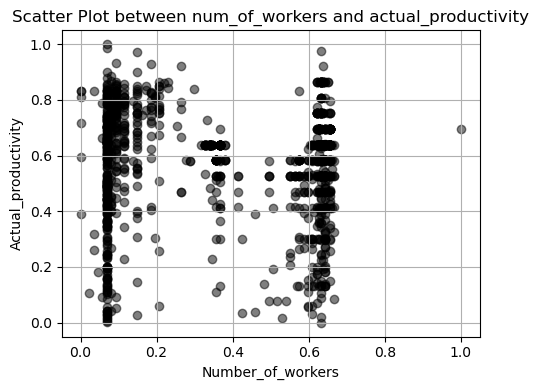

In [28]:
# Plotting scatter plot between 'number of workers' and 'actual productivity'
plt.figure(figsize=(5, 4))

# Scale the 'no_of_workers' and 'actual_productivity' columns
df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_scaled[['no_of_workers', 'actual_productivity']] = scaler.fit_transform(df[['no_of_workers', 'actual_productivity']]) 

# Create scatter plot
plt.scatter(df_scaled['no_of_workers'], df_scaled['actual_productivity'], color='black', alpha=0.5)

# Add labels and title
plt.xlabel('Number_of_workers')
plt.ylabel('Actual_productivity')
plt.title('Scatter Plot between num_of_workers and actual_productivity')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

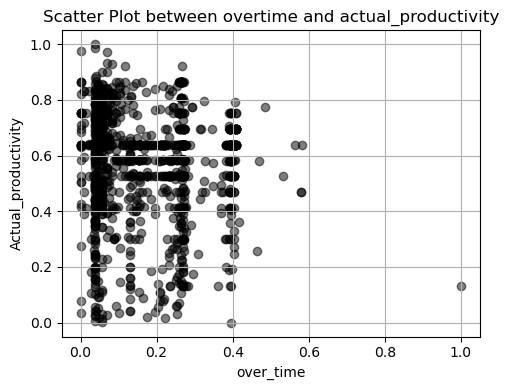

In [29]:
# Plotting scatter plot between 'overtime' and 'actual productivity'
plt.figure(figsize=(5, 4))

# Scale the 'no_of_workers' and 'actual_productivity' columns
df_scaled1 = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_scaled1[['over_time', 'actual_productivity']] = scaler.fit_transform(df[['over_time', 'actual_productivity']]) 

# Create scatter plot
plt.scatter(df_scaled1['over_time'], df_scaled1['actual_productivity'], color='black', alpha=0.5)

# Add labels and title
plt.xlabel('over_time')
plt.ylabel('Actual_productivity')
plt.title('Scatter Plot between overtime and actual_productivity')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

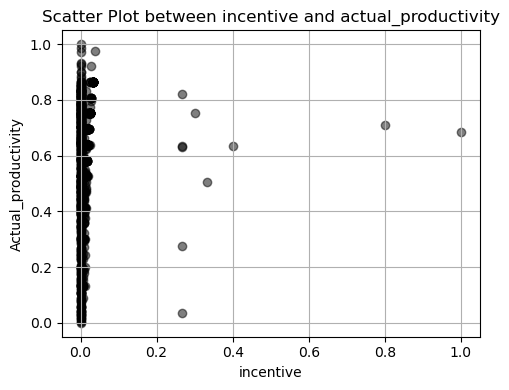

In [30]:
# Plotting scatter plot between 'incentive' and 'actual productivity'
plt.figure(figsize=(5, 4))

# Scale the 'no_of_workers' and 'actual_productivity' columns
df_scaled2 = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_scaled2[['incentive', 'actual_productivity']] = scaler.fit_transform(df[['incentive', 'actual_productivity']]) 

# Create scatter plot
plt.scatter(df_scaled2['incentive'], df_scaled2['actual_productivity'], color='black', alpha=0.5)

# Add labels and title
plt.xlabel('incentive')
plt.ylabel('Actual_productivity')
plt.title('Scatter Plot between incentive and actual_productivity')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Advanced analysis 

In [31]:
# checking normality of "actual production'
from scipy.stats import shapiro

statistic, p_value = shapiro(df['actual_productivity'])
print("Shapiro-Wilk statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")


Shapiro-Wilk statistic: 0.943946361541748
p-value: 6.876279730732294e-21
Reject the null hypothesis: The data is not normally distributed.


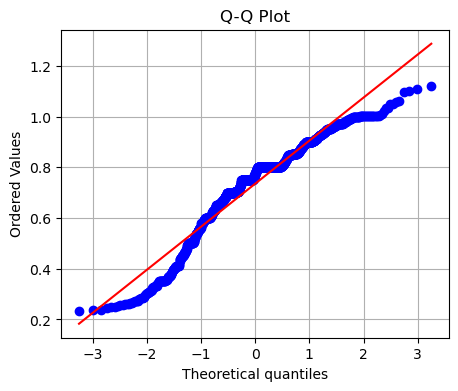

In [32]:
import scipy.stats as stats
import numpy as np

# Assuming df is your DataFrame and 'actual_productivity' is the column containing your data
data = df['actual_productivity']

plt.figure(figsize=(5, 4))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()


In [33]:
from scipy.stats import mannwhitneyu


statistic, p_value = mannwhitneyu(df['actual_productivity'], df['targeted_productivity'])
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Actual productivity tends to be greater than predicted productivity.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between actual and targeted productivity.")

Mann-Whitney U statistic: 859428.0
p-value: 1.6457378667596712e-17
Reject the null hypothesis: Actual productivity tends to be greater than predicted productivity.


In [34]:
#Actual productivity by day of the week
from scipy.stats import kruskal

x=df['actual_productivity']
y=df['day']
data_groups = [x[y == category] for category in np.unique(y)]

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(*data_groups)
print("Kruskal-Wallis H statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median among the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median among the groups.")

Kruskal-Wallis H statistic: 4.305541645652699
p-value: 0.5063147915119495
Fail to reject the null hypothesis: There is no significant difference in median among the groups.


In [35]:
#Actual productivity by team
from scipy.stats import kruskal

x=df['actual_productivity']
y=df['team']
data_groups = [x[y == category] for category in np.unique(y)]

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(*data_groups)
print("Kruskal-Wallis H statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median among the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median among the groups.")

Kruskal-Wallis H statistic: 124.07081374298983
p-value: 2.7448718228577555e-21
Reject the null hypothesis: There is a significant difference in median among the groups.


In [36]:
# checking normality of 'smv'
from scipy.stats import shapiro

statistic, p_value = shapiro(df['smv'])
print("Shapiro-Wilk statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")


Shapiro-Wilk statistic: 0.8578962087631226
p-value: 1.5806751459589165e-31
Reject the null hypothesis: The data is not normally distributed.


In [37]:
from scipy.stats import spearmanr


x=df['smv']
y=df['wip']
statistic, p_value = spearmanr(x, y)
print("Spearman's rank correlation coefficient:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the two continuous variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the two continuous variables.")


Spearman's rank correlation coefficient: -0.34339617058528193
p-value: 1.8426313553689049e-34
Reject the null hypothesis: There is a significant association between the two continuous variables.


In [38]:
#Actual productivity by team
from scipy.stats import kruskal

x=df['actual_productivity']
y=df['department']
data_groups = [x[y == category] for category in np.unique(y)]

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(*data_groups)
print("Kruskal-Wallis H statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median among the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median among the groups.")

Kruskal-Wallis H statistic: 27.288442517046633
p-value: 1.7525582757876983e-07
Reject the null hypothesis: There is a significant difference in median among the groups.


In [39]:
from scipy.stats import spearmanr


x=df['actual_productivity']
y=df['no_of_workers']
statistic, p_value = spearmanr(x, y)
print("Spearman's rank correlation coefficient:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the actual_productivity and number of workers.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the actual_productivity and number of workers.")

Spearman's rank correlation coefficient: -0.03539513201306822
p-value: 0.2210677847821179
Fail to reject the null hypothesis: There is no significant association between the actual_productivity and number of workers.


In [40]:
from scipy.stats import spearmanr


x=df['actual_productivity']
y=df['over_time']
statistic, p_value = spearmanr(x, y)
print("Spearman's rank correlation coefficient:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the actual productivity and overtime.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the actual productivity and overtime.")

Spearman's rank correlation coefficient: -0.07575508881770679
p-value: 0.008742031677690398
Reject the null hypothesis: There is a significant association between the actual productivity and overtime.


In [41]:
from scipy.stats import spearmanr


x=df['actual_productivity']
y=df['incentive']
statistic, p_value = spearmanr(x, y)
print("Spearman's rank correlation coefficient:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the actual productivity and incentive.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the actual productivity and incentive.")

Spearman's rank correlation coefficient: 0.21706358696654462
p-value: 3.131728380005837e-14
Reject the null hypothesis: There is a significant association between the actual productivity and incentive.


# Machine Learning Model Selection and training

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [64]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['department'])

In [65]:
# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['actual_productivity','day','date','quarter'])
y = df_encoded['actual_productivity']

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Choose the Linear Regression model
model = LinearRegression()

In [68]:
# Train the Linear Regression model on the training dataset
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Evaluate the model on the testing dataset
y_pred_linear= model.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0215833323600775


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Assuming X contains your features and y contains  target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_decisiontree= model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_decisiontree)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.01814619557581198


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains  target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_RandomForest = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_RandomForest)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.012225025800593389


In [73]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X contains your features and y contains target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the SVM Regression model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_SVR = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_SVR)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.015525296753517836


In [75]:
# Calculate MSE for each model
mse_linear_regression = mean_squared_error(y_test, y_pred_linear)
mse_decision_tree = mean_squared_error(y_test, y_pred_decisiontree)
mse_random_forest = mean_squared_error(y_test, y_pred_RandomForest)
mse_SVR = mean_squared_error(y_test, y_pred_SVR)

# Compare MSE values
mse_values = {
    'Linear Regression': mse_linear_regression,
    'Decision Tree': mse_decision_tree,
    'Random Forest': mse_random_forest,
    'SVM': mse_SVR
}

best_model = min(mse_values, key=mse_values.get)
print("Best performing model:", best_model)
print("Mean Squared Error for best model:", mse_values[best_model])

Best performing model: Random Forest
Mean Squared Error for best model: 0.012225025800593389


In [76]:
from sklearn.model_selection import GridSearchCV

# hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for best model:", mse)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error for best model: 0.012201609843187269
